In [75]:
import os
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.colors as mcolors
import mapclassify
from matplotlib.patches import Patch

In [76]:
# Setting the working directory
from pathlib import Path

# Set base project path
base_path = Path("C:/Users/juami/Dropbox/RAships/2-Folklore-Nathan-Project/EA-Maps-Nathan-project/Measures_work")

# Set file paths
precol_path = base_path / "maps" / "interim" / "world_thiessen_FINAL" / "EAESW" / "EAESW_XY_World_Thiessen.shp"
poscol_path = base_path / "data" / "raw" / "ethnologue" / "ancestral_characteristics_database_language_level" / "Ethnologue_16_shapefile" / "langa_no_overlap_biggest_clean.shp"

precol_csv_path = base_path / "data" / "interim" / "Motifs_EA_WESEE_humanvsnature_all.csv"
poscol_csv_path = base_path / "data" / "interim" / "Motifs_EA_WESEE_Ethnologue_humanvsnature_all.csv"

export_path = base_path / "deliveries" / "maps_presentation_12052025"


In [77]:
# Read the shapefiles and CSV files

precol_shape = gpd.read_file(precol_path)
poscol_shape = gpd.read_file(poscol_path)

precol_df = pd.read_csv(precol_csv_path)
poscol_df = pd.read_csv(poscol_csv_path)

# Merge the shapefiles with the CSV data
precol_shape_merged = precol_shape.merge(precol_df, left_on='v107', right_on='v107', how='left')
poscol_shape_merged = poscol_shape.merge(poscol_df, left_on='ID', right_on='id', how='left')

In [78]:
def truncate_colormap(cmap_name='BuPu', minval=0.3, maxval=1.0, n=100):
    cmap = plt.get_cmap(cmap_name)
    new_cmap = mcolors.LinearSegmentedColormap.from_list(
        f'{cmap_name}_trunc', cmap(np.linspace(minval, maxval, n)))
    return new_cmap

# Create a stronger BuPu (skip the lightest 30%)
strong_bupu = truncate_colormap('BuPu', 0.3, 1.0)

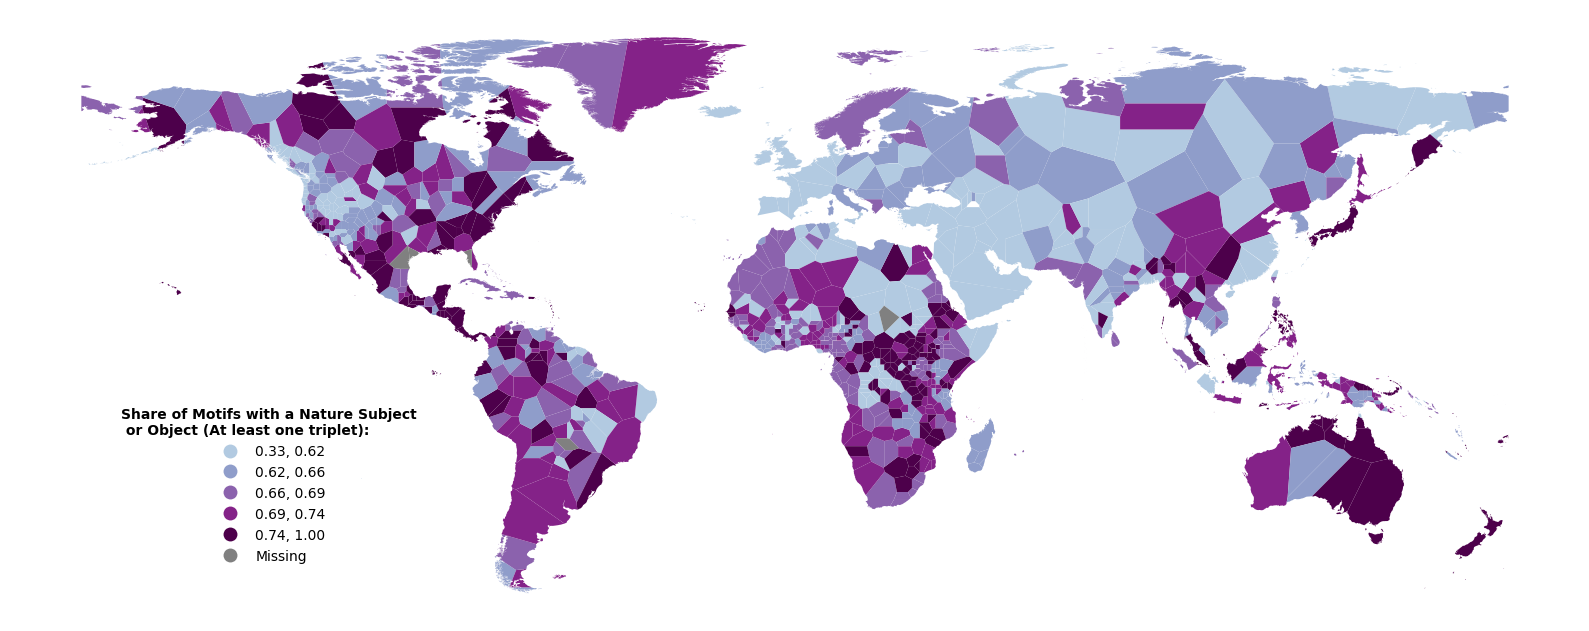

In [79]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8), facecolor='white')

gdf = precol_shape_merged.copy()

gdf.plot(
    ax=ax,
    column='sh_nature_any_motif_atl',
    scheme='quantiles',
    k=5,
    cmap=truncated_bupu,
    edgecolor='black',
    linewidth=0,
    legend=True,
    legend_kwds={'frameon': False},
    missing_kwds={
        "color": "gray",
        "label": "Missing"
    }
)

# Remove axis
ax.set_axis_off()

# Move legend using bbox_to_anchor (x, y, width, height)
leg = ax.get_legend()
if leg:
    leg.set_bbox_to_anchor((0.07, 0.17, 0.2, 0.2))  # Fine-tune as needed
    leg.set_title("Share of Motifs with a Nature Subject \n or Object (At least one triplet):",
                  prop={'weight': 'bold'})
    leg.set_frame_on(False)  # No border

plt.tight_layout()

# Save to PDF
plt.savefig(export_path / "PRECOL_sh_nature_any_motif_atl.pdf", format='pdf', bbox_inches='tight')

# Optional: also show the figure
plt.show()
